In [ ]:
import nltk
from nltk.stem import WordNetLemmatizer 
from nltk.tokenize import word_tokenize 
from nltk.corpus import stopwords
from urllib.request import urlopen
import re
import inflect
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
 
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
p = inflect.engine()
lemmatizer = WordNetLemmatizer()

In [ ]:
def read_book(url):
  return urlopen(url).read()

In [ ]:
def print_book_title_and_length(book):
  print(book[:75],len(book))

In [ ]:
def decode_book(book):
  return book.decode('utf-8')

In [ ]:
def discard_useless_part (text):
  sidx = text.find('*** START OF THE PROJECT ')
  eidx = text.find('*** END OF THE PROJECT ')
  print("Discarding Before - ", sidx)
  print("Discarding After - ", eidx)
  text = text[sidx:eidx]
  return text

In [ ]:
def to_lower(text):
  return text.lower()

In [ ]:
def remove_URL(text):
    return re.sub(r"http\S+", "", text)

In [ ]:
def decontracted(text):
    # specific
    text = re.sub(r"won\'t", "will not", text)
    text = re.sub(r"can\'t", "can not", text)

    # general
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    return text

In [ ]:
def num2word(text):
  list_of_words = text.split()
  modified_text = []

  for word in list_of_words:
    if word.isdigit():
      number_in_word = p.number_to_words(word)
      modified_text.append(number_in_word)
    else:
      modified_text.append(word)
      
  return ' '.join(modified_text)

In [ ]:
def remove_punctuation(text):
  tokens = word_tokenize(text)
  words = [word for word in tokens if word.isalpha()]
  return ' '.join(words)

In [ ]:
def lemmatize_word(text): 
    word_tokens = word_tokenize(text)  
    lemmas = [lemmatizer.lemmatize(word, pos ='v') for word in word_tokens] 
    return ' '.join(lemmas)

In [ ]:
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

In [ ]:
url1 = 'http://www.gutenberg.org/files/66753/66753-0.txt'
url2 = 'http://www.gutenberg.org/files/66751/66751-0.txt'

def PreProcessedBook(url):
  book = read_book(url)
  print_book_title_and_length(book)
  text = decode_book(book)
  text = discard_useless_part(text)
  text = to_lower(text)
  text = remove_URL(text)
  text = decontracted(text)
  text = num2word(text)
  text = remove_punctuation(text)
  text = lemmatize_word(text)
  return (text)

In [ ]:
book1 = read_book(url1)
print(book1[:2000])

b'\xef\xbb\xbfThe Project Gutenberg eBook of Traitor\'s Choice, by Paul W. Fairman\r\n\r\nThis eBook is for the use of anyone anywhere in the United States and\r\nmost other parts of the world at no cost and with almost no restrictions\r\nwhatsoever. You may copy it, give it away or re-use it under the terms\r\nof the Project Gutenberg License included with this eBook or online at\r\nwww.gutenberg.org. If you are not located in the United States, you\r\nwill have to check the laws of the country where you are located before\r\nusing this eBook.\r\n\r\nTitle: Traitor\'s Choice\r\n\r\nAuthor: Paul W. Fairman\r\n\r\nRelease Date: November 16, 2021 [eBook #66753]\r\n\r\nLanguage: English\r\n\r\nCharacter set encoding: UTF-8\r\n\r\nProduced by: Greg Weeks, Mary Meehan and the Online Distributed\r\n             Proofreading Team at http://www.pgdp.net\r\n\r\n*** START OF THE PROJECT GUTENBERG EBOOK TRAITOR\'S CHOICE ***\r\n\r\n\r\n\r\n\r\n                           TRAITOR\'S CHOICE\r\n\r\n 

In [ ]:
book1_text = PreProcessedBook(url1)
book2_text = PreProcessedBook(url2)

b"\xef\xbb\xbfThe Project Gutenberg eBook of Traitor's Choice, by Paul W. Fairman\r\n\r\nT" 38588
Discarding Before -  804
Discarding After -  19831
b'\xef\xbb\xbfThe Project Gutenberg eBook of The Heir, by Sydney C. Grier\r\n\r\nThis eBoo' 600232
Discarding Before -  764
Discarding After -  568709


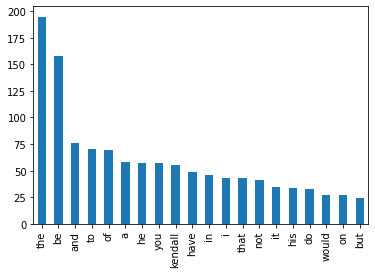

In [ ]:
word_tokens1 = word_tokenize(book1_text) 
pd.Series(word_tokens1).value_counts()[:20].plot(kind='bar')

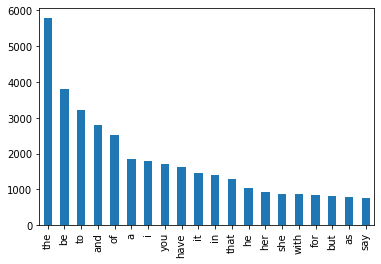

In [ ]:
word_tokens2 = word_tokenize(book2_text) 
pd.Series(word_tokens2).value_counts()[:20].plot(kind='bar')

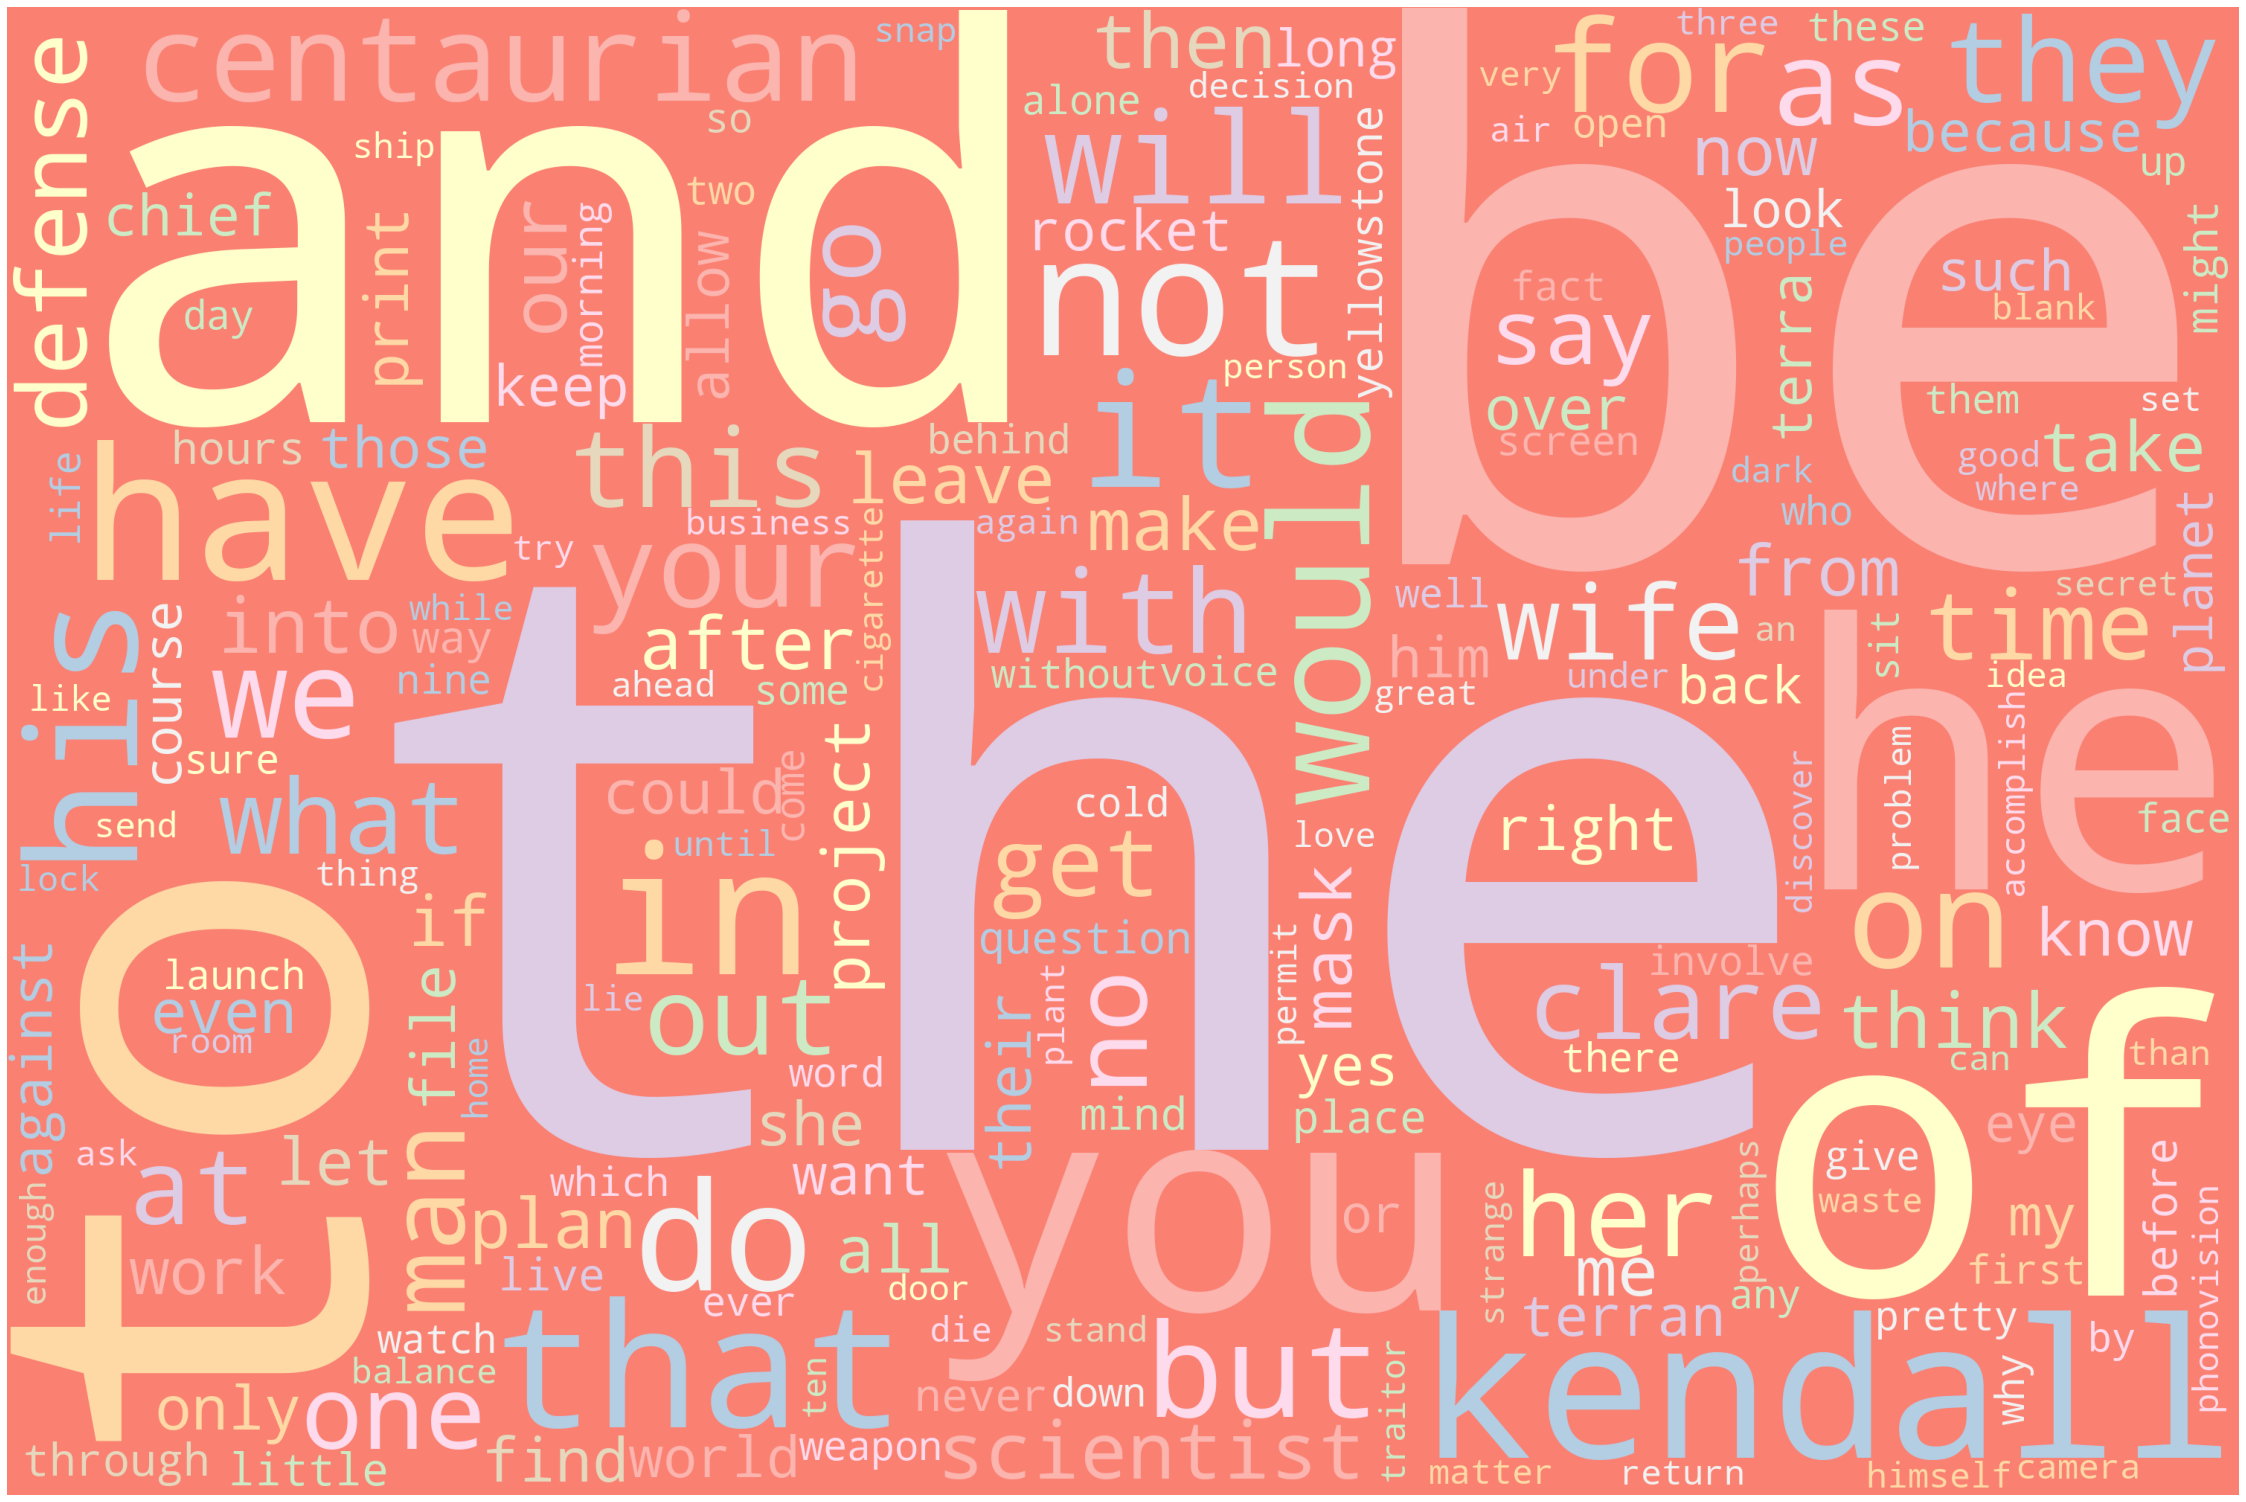

In [ ]:
# Generate word cloud
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, 
                    background_color='salmon', colormap='Pastel1',stopwords= [],
                      collocations=False).generate(' '.join(word_tokens1))
# Plot
plot_cloud(wordcloud)

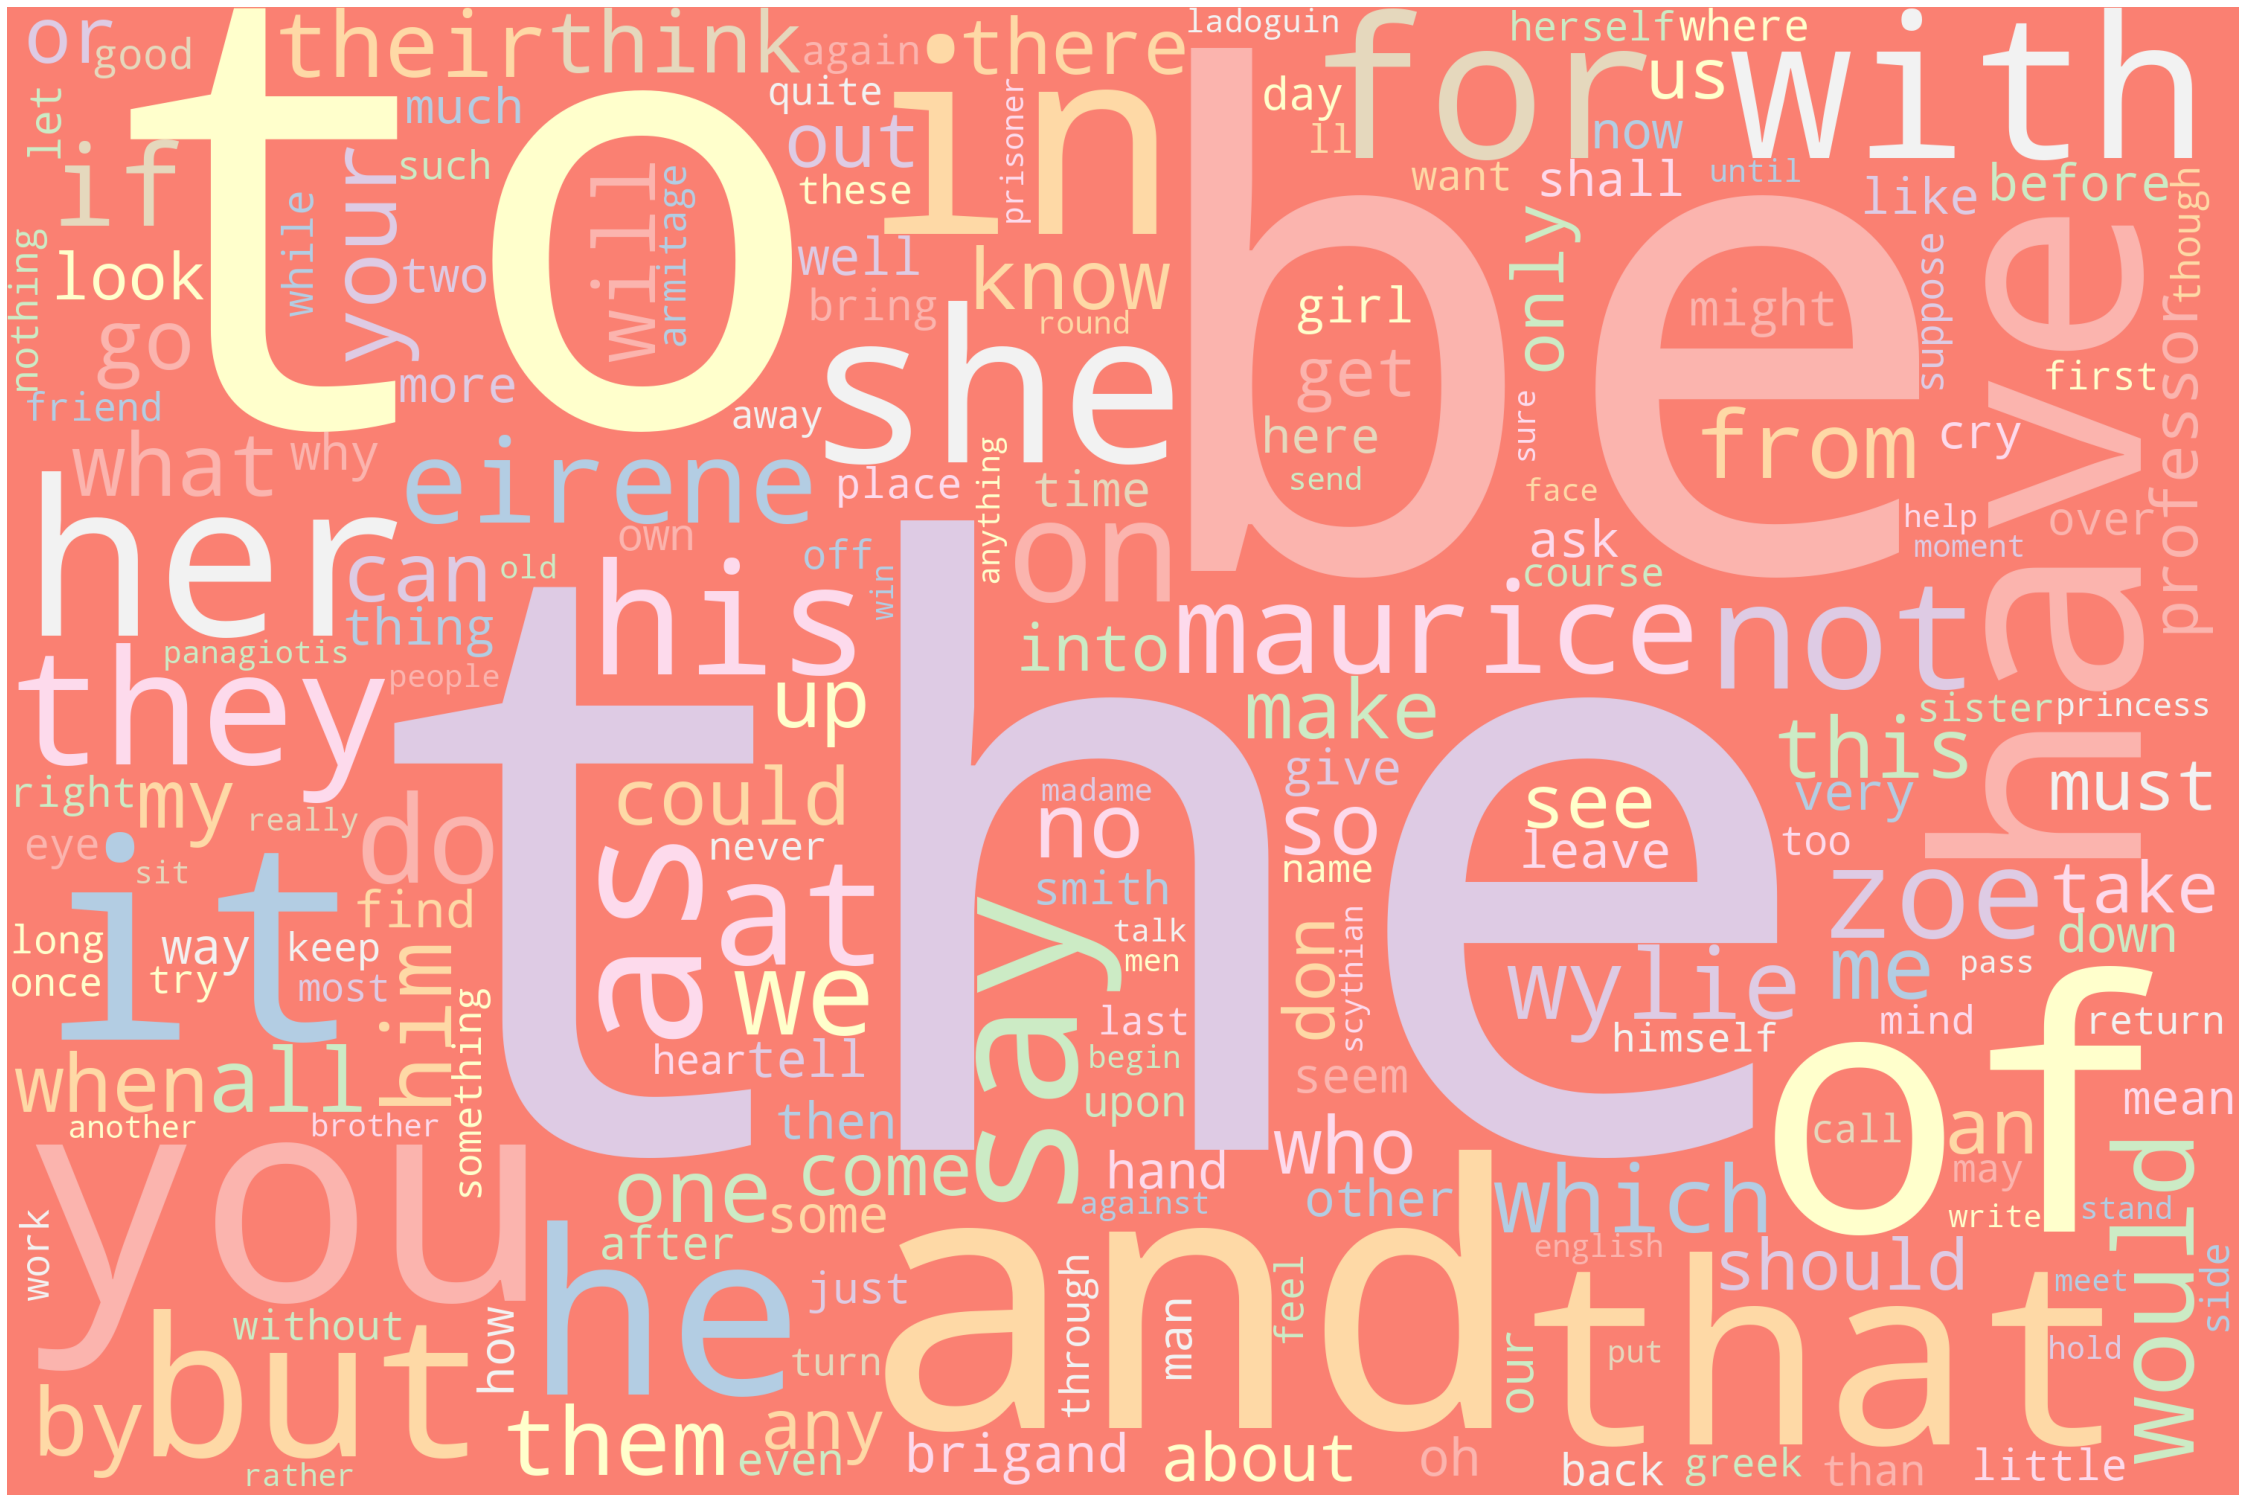

In [ ]:
# Generate word cloud
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='salmon', colormap='Pastel1',stopwords= [], collocations=False).generate(' '.join(word_tokens2))
# Plot
plot_cloud(wordcloud)

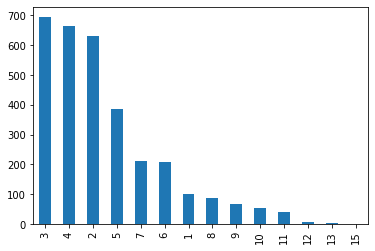

In [ ]:
length_1 = [len(word) for word in word_tokens1]
pd.Series(length_1).value_counts()[:20].plot(kind='bar')

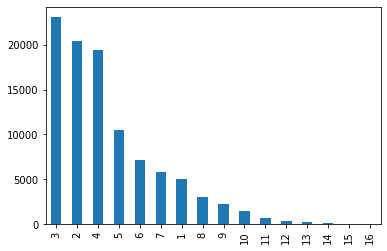

In [ ]:
length_2 = [len(word) for word in word_tokens2]
pd.Series(length_2).value_counts()[:20].plot(kind='bar')

In [ ]:
def remove_stopwords(tokens):
    return [word for word in tokens if word not in STOPWORDS]

In [ ]:
T1 = remove_stopwords(word_tokens1)
T2 = remove_stopwords(word_tokens2)

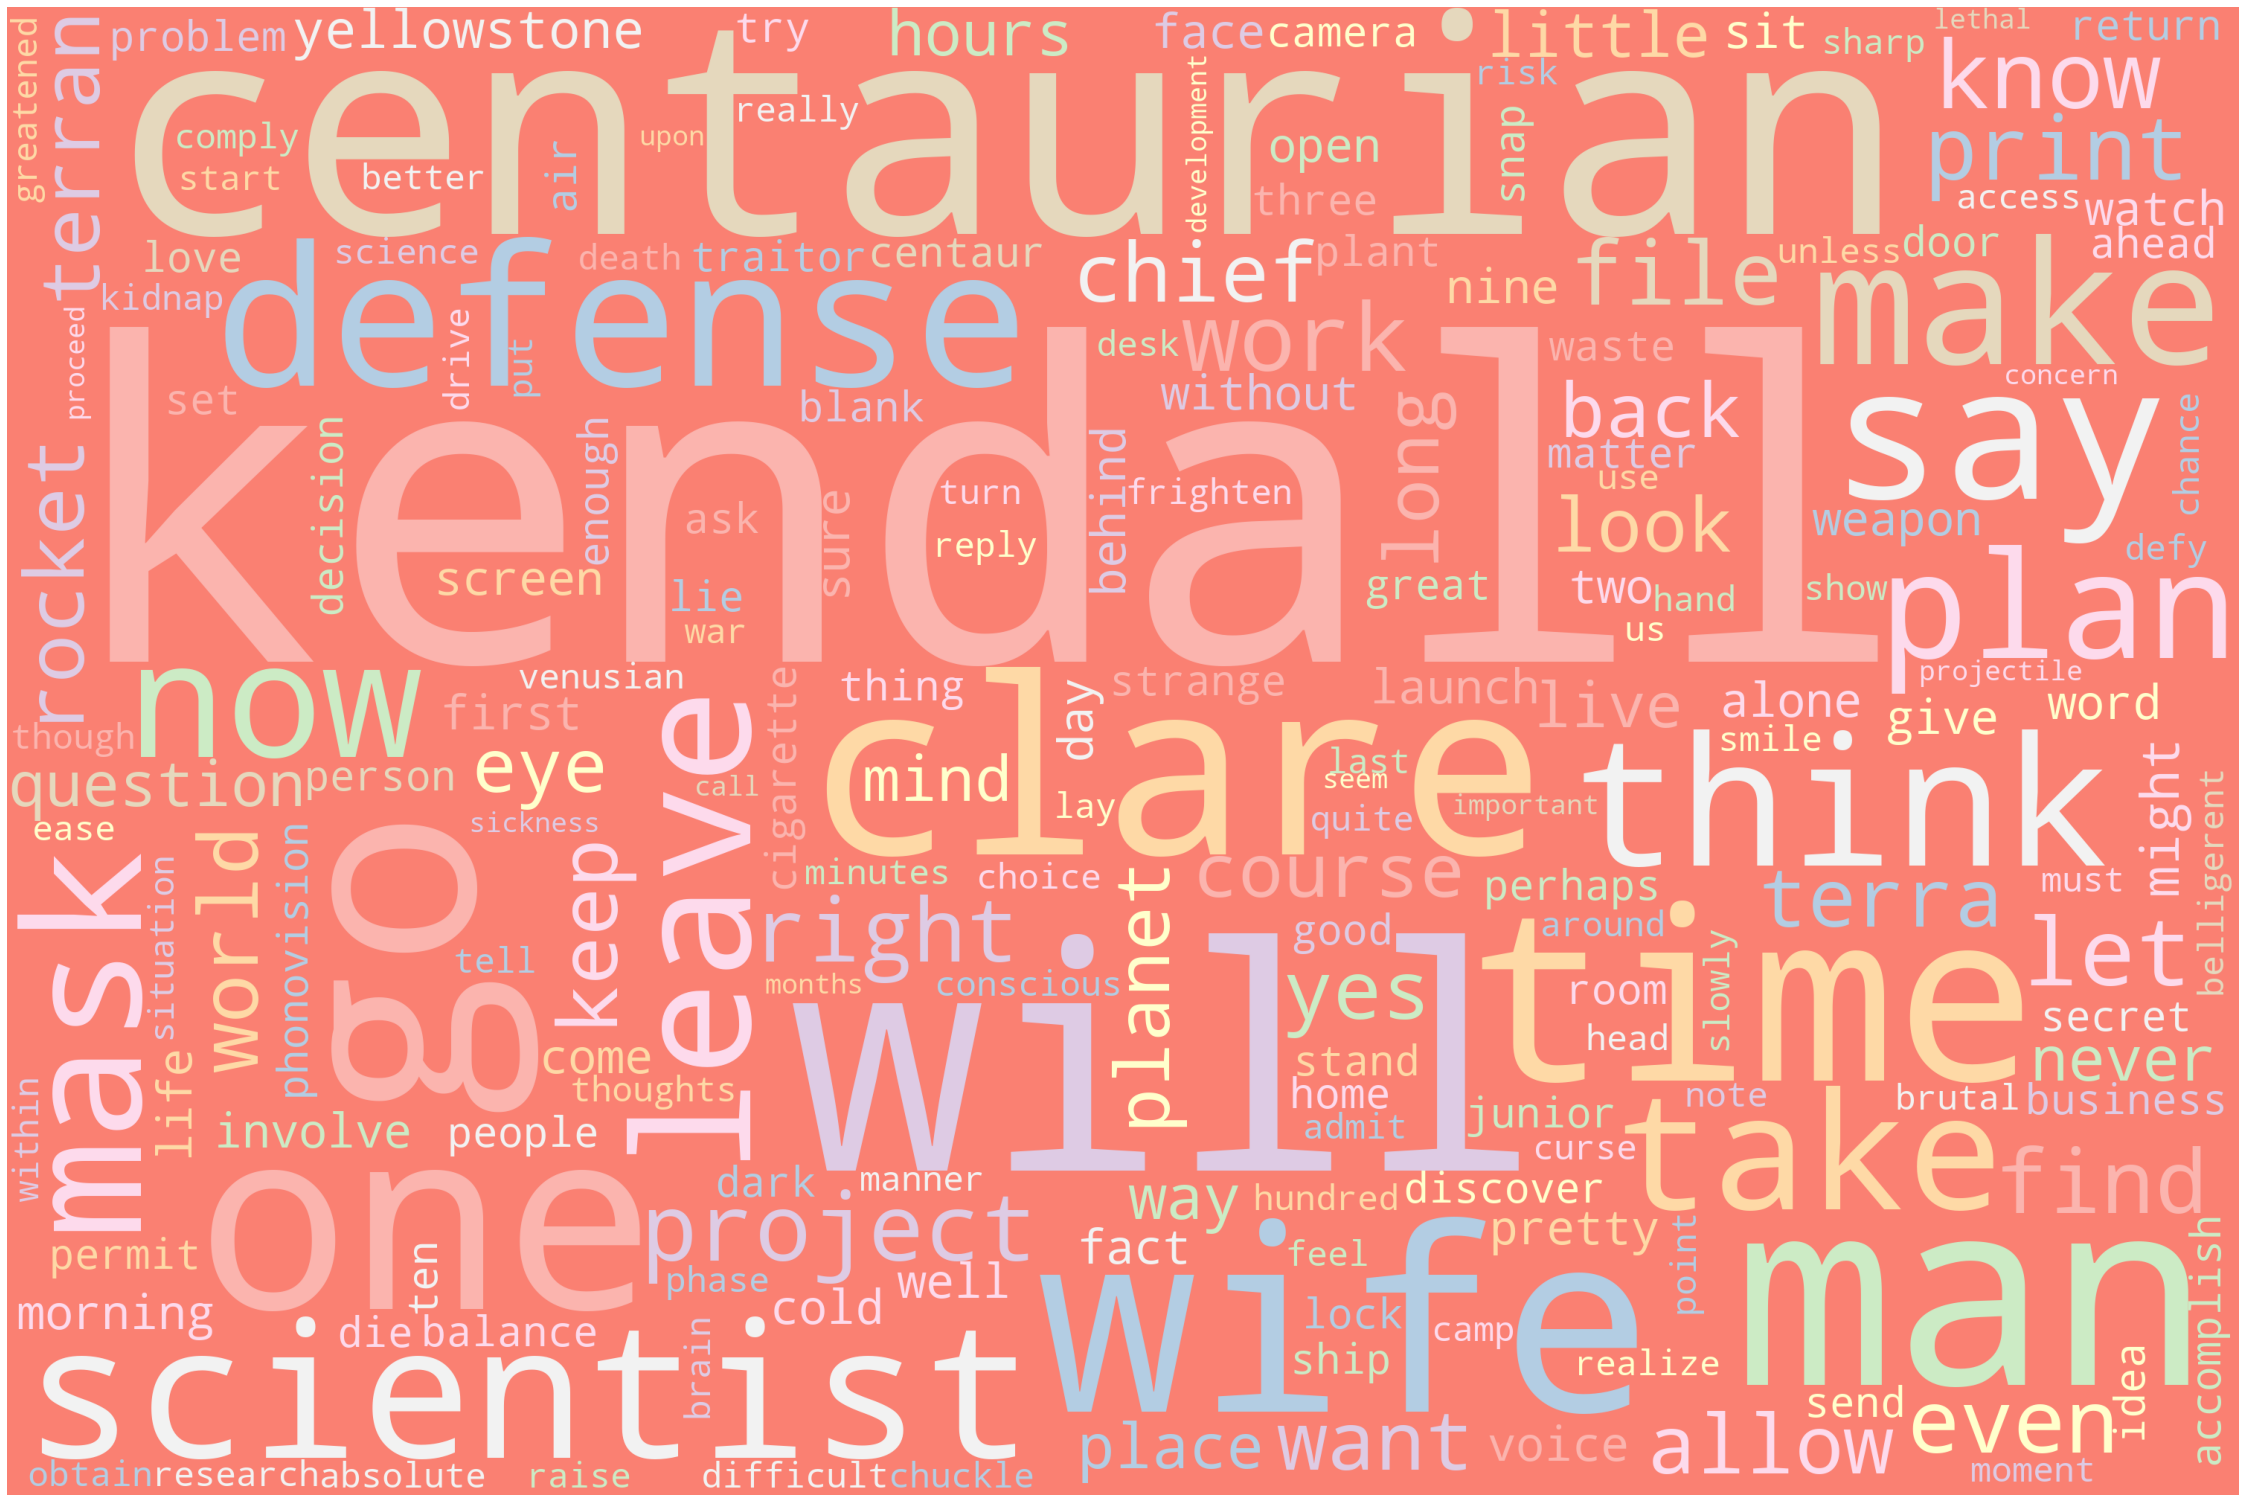

In [ ]:
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='salmon', colormap='Pastel1',stopwords= [], collocations=False).generate(' '.join(T1))
# Plot
plot_cloud(wordcloud)

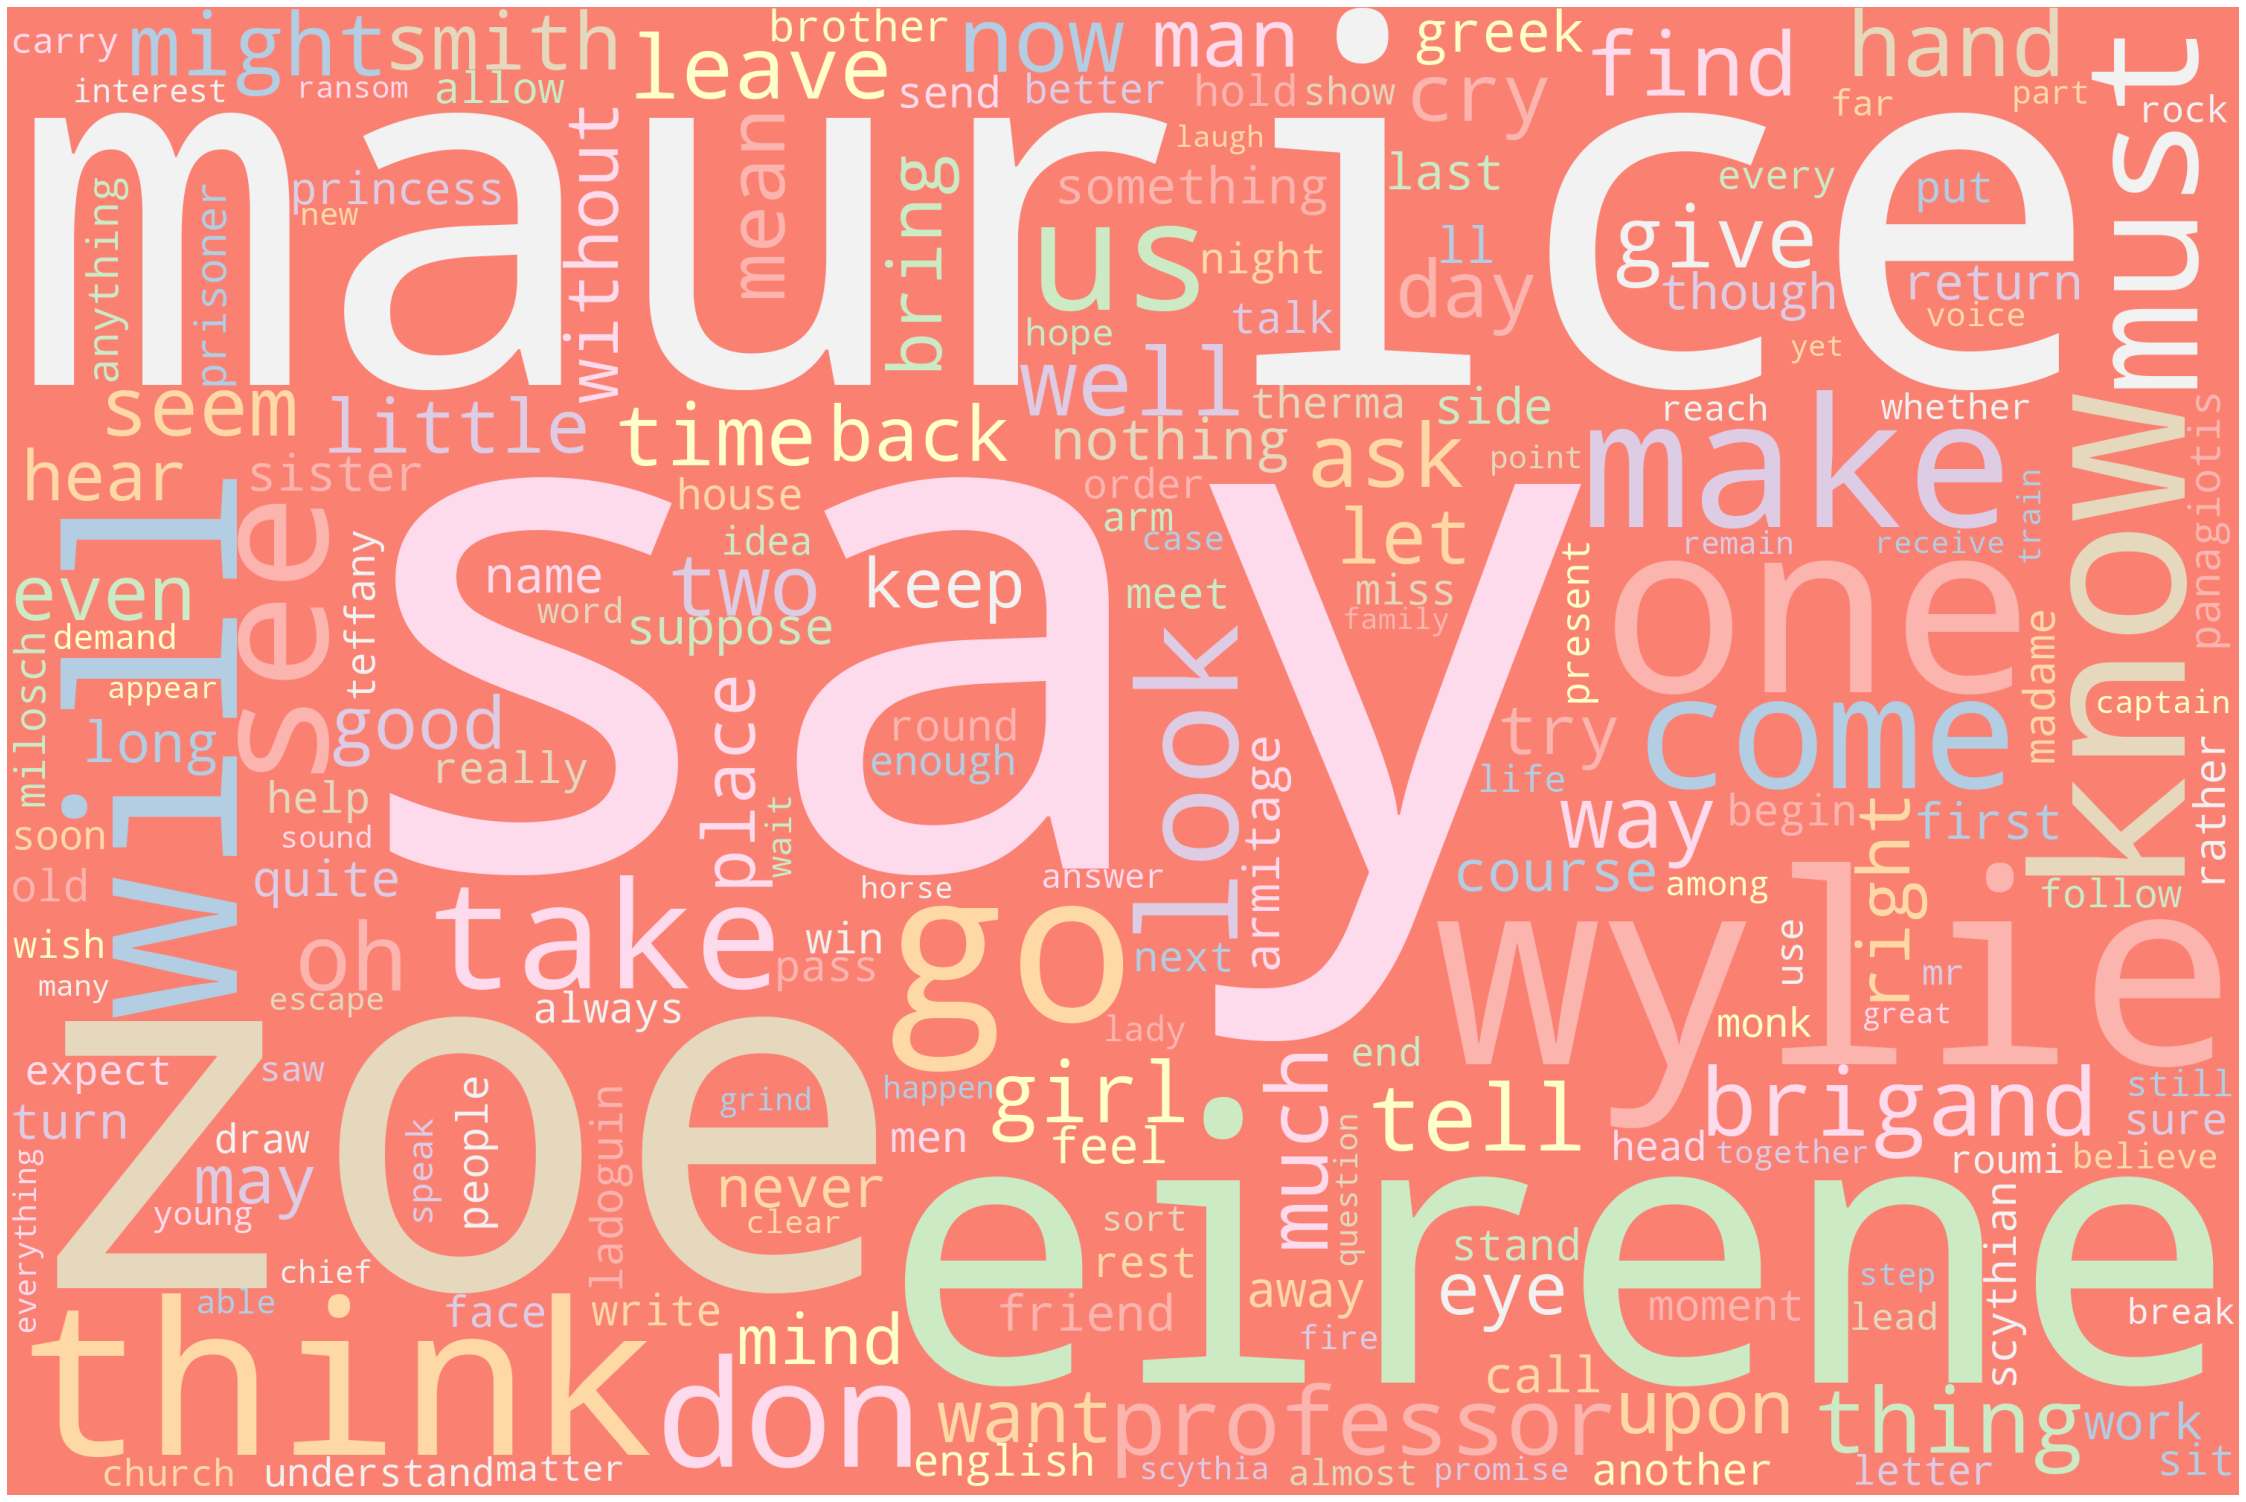

In [ ]:
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='salmon', colormap='Pastel1',stopwords= [], collocations=False).generate(' '.join(T2))
# Plot
plot_cloud(wordcloud)


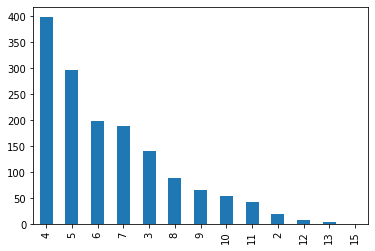

In [ ]:
length_1 = [len(word) for word in T1]
pd.Series(length_1).value_counts()[:20].plot(kind='bar')

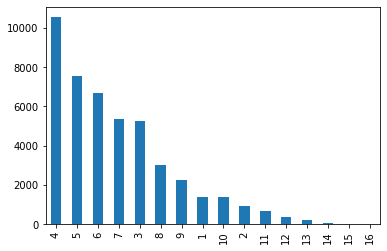

In [ ]:
length_2 = [len(word) for word in T2]
pd.Series(length_2).value_counts()[:20].plot(kind='bar')

In [ ]:
from collections import Counter

In [ ]:
def tag_treebank(text):
  tokenized=nltk.word_tokenize(text)
  tagged=nltk.pos_tag(tokenized)
  return tagged

In [ ]:
from collections import Counter
def get_counts(tags):
  counts = Counter( tag for word,  tag in tags)
  return counts

In [ ]:
book1_tags=tag_treebank(book1_text)
book1_pos_count=get_counts(book1_tags)
book2_tags=tag_treebank(book2_text)
book2_pos_count=get_counts(book2_tags)

In [ ]:
len(book1_pos_count)

29

In [ ]:
book2_pos_count

Counter({"''": 2,
         'CC': 3950,
         'CD': 542,
         'DT': 9699,
         'EX': 147,
         'FW': 17,
         'IN': 12286,
         'JJ': 7426,
         'JJR': 239,
         'JJS': 174,
         'MD': 2210,
         'NN': 18689,
         'NNP': 49,
         'NNPS': 1,
         'NNS': 2532,
         'PDT': 123,
         'PRP': 8063,
         'PRP$': 2723,
         'RB': 5926,
         'RBR': 125,
         'RBS': 63,
         'RP': 659,
         'TO': 3229,
         'UH': 21,
         'VB': 10389,
         'VBD': 616,
         'VBG': 97,
         'VBN': 1525,
         'VBP': 5395,
         'VBZ': 751,
         'WDT': 569,
         'WP': 644,
         'WP$': 35,
         'WRB': 693})

In [ ]:
def FrequencyDist(tags):
  wfd = nltk.FreqDist(t for (w,t) in tags)
  wfd
  wfd.plot(50)


In [ ]:
book1_pos_count=get_counts(book1_tags)
book2_pos_count=get_counts(book2_tags)


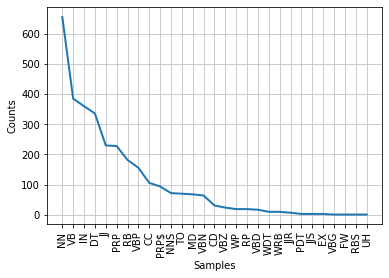

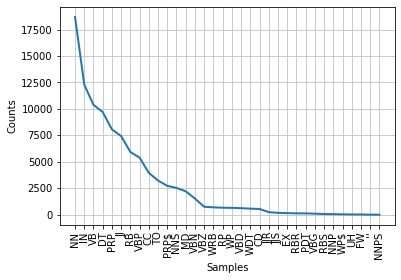

In [ ]:
FrequencyDist(book1_tags)
FrequencyDist(book2_tags)

In [ ]:
def tag_treebank(tokens):
  tagged=nltk.pos_tag(tokens)
  return tagged

In [ ]:
book1_tags = tag_treebank(T1)
book2_tags = tag_treebank(T2)

In [ ]:
print(book1_tags)

[('start', 'NN'), ('project', 'NN'), ('gutenberg', 'NN'), ('ebook', 'NN'), ('traitor', 'NN'), ('choice', 'NN'), ('traitor', 'NN'), ('choice', 'NN'), ('paul', 'NN'), ('fairman', 'NN'), ('kendall', 'NN'), ('difficult', 'JJ'), ('decision', 'NN'), ('make', 'VBP'), ('defy', 'NN'), ('alien', 'NN'), ('clare', 'NN'), ('face', 'NN'), ('horrible', 'JJ'), ('death', 'NN'), ('comply', 'NN'), ('whole', 'JJ'), ('planet', 'NN'), ('must', 'MD'), ('die', 'VB'), ('transcriber', 'NNP'), ('note', 'NN'), ('etext', 'NN'), ('produce', 'VBP'), ('imagination', 'NN'), ('stories', 'NNS'), ('science', 'NN'), ('fantasy', 'NN'), ('august', 'VBP'), ('one', 'CD'), ('thousand', 'CD'), ('nine', 'CD'), ('hundred', 'VBN'), ('extensive', 'JJ'), ('research', 'NN'), ('uncover', 'JJ'), ('evidence', 'NN'), ('copyright', 'NN'), ('publication', 'NN'), ('renew', 'VBD'), ('phonovision', 'NN'), ('bell', 'NN'), ('ring', 'VBG'), ('reed', 'VB'), ('kendall', 'JJ'), ('reach', 'NN'), ('switch', 'NN'), ('take', 'VB'), ('eye', 'NN'), ('blu

In [ ]:
print(book2_tags)

[('start', 'NN'), ('project', 'NN'), ('gutenberg', 'NN'), ('ebook', 'VBP'), ('heir', 'PRP$'), ('heir', 'NN'), ('sydney', 'NN'), ('grier', 'NN'), ('author', 'NN'), ('uncrowned', 'VBD'), ('king', 'VBG'), ('warden', 'JJ'), ('march', 'NN'), ('etc', 'NN'), ('illustrations', 'NNS'), ('george', 'VBP'), ('percy', 'JJ'), ('balkan', 'JJ'), ('series', 'NN'), ('william', 'NN'), ('blackwood', 'NN'), ('sons', 'NNS'), ('edinburgh', 'VBP'), ('london', 'JJ'), ('mcmvi', 'JJ'), ('image', 'NN'), ('caption', 'NN'), ('arm', 'NN'), ('grip', 'NN'), ('one', 'CD'), ('brigands', 'VBZ'), ('trudge', 'NN'), ('silently', 'RB'), ('beside', 'JJ'), ('content', 'NN'), ('de', 'IN'), ('jure', 'NN'), ('ii', 'NN'), ('stock', 'NN'), ('emperors', 'NNS'), ('iii', 'VBP'), ('orient', 'JJ'), ('express', 'NN'), ('iv', 'NN'), ('full', 'JJ'), ('stop', 'NN'), ('vi', 'NN'), ('trap', 'NN'), ('vii', 'NN'), ('night', 'NN'), ('s', 'NN'), ('lodge', 'NN'), ('viii', 'JJ'), ('history', 'NN'), ('day', 'NN'), ('ix', 'VB'), ('one', 'CD'), ('many